In [53]:
from collections import namedtuple
import pandas as pd
import seaborn as sns
%matplotlib inline

In [86]:
def loadData(filename):    
    DataArr = namedtuple('DataArr', 'bias voltage1 voltage2')
    with open(filename) as f:
        lines = f.readlines()

        bias = []
        voltage1 = []
        voltage2 = []
        dataDict = {}
        biasArr = []
        for line in lines[52:-1]:
            #print(str(line[0:5]))
            data = line.split()
            if len(data) > 0:
                B = float(data[1])
                bias.append(float(data[0]))
                voltage1.append(float(data[3]))
                #voltage2.append(float(data[4]))
            elif not type(B) == bool:
                dataDict[B] = voltage1
                biasArr.append(bias)
                bias = []
                voltage1 = []
                #voltage2 = []
                B = False
    return dataDict, biasArr[0]

def loadMagSweep(filename, colx, coly):    
    DataArr = namedtuple('DataArr', 'bias voltage1 voltage2')
    with open(filename) as f:
        lines = f.readlines()

        colxDat= []
        colyDat = []
        dataDict = {}
        biasArr = []
        for line in lines[52:-1]:
            #print(str(line[0:5]))
            data = line.split()
            if len(data) > 0:
                colxDat.append(float(data[colx]))
                colyDat.append(float(data[coly]))
                #voltage2.append(float(data[4]))
            elif not type(B) == bool:
                print(dataDict)
                dataDict[B] = voltage1
                biasArr.append(bias)
                bias = []
                voltage1 = []
                #voltage2 = []
                B = False
    return colxDat, colyDat


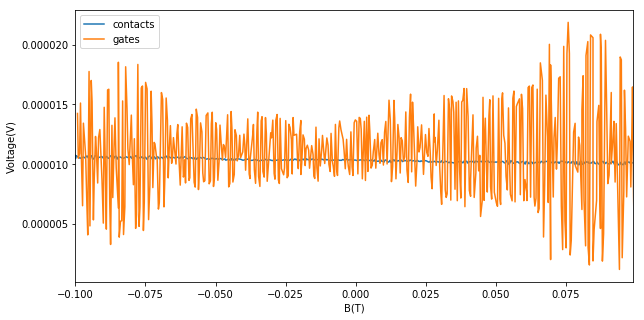

In [209]:
filename1 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_NS_5.dat'
B1, Voltage1 = loadMagSweep(filename1,0,3)
df1 = pd.DataFrame(data=Voltage1, index=B1, columns=['contacts'])
#df1.plot()

filename2 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_NS_6.dat'
B2, Voltage2 = loadMagSweep(filename2,0,3)
df2 = pd.DataFrame(data=Voltage2, index=B2, columns=['gates'])

mean2 = df2.rolling(window=50, center=True).mean()

ax = df1.plot(figsize=(10,5))
ax.set_xlabel("B(T)")
ax.set_ylabel("Voltage(V)")
df2.plot(ax=ax)
#mean2.plot(ax=ax, label="gates_mean")


In [194]:
filename1 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_NS_5.dat'
B1, Voltage1 = loadData(filename1)
df1 = pd.DataFrame(data=Voltage1, index=B1, columns=['contacts'])

IndexError: list index out of range

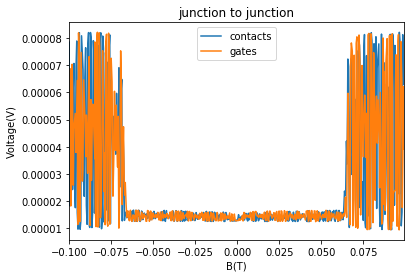

In [155]:
filename1 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_NS_5.dat'
B1, Voltage1 = loadMagSweep(filename1,0,4)
df1 = pd.DataFrame(data=Voltage1, index=B1, columns=['contacts'])


filename2 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_NS_6.dat'
B2, Voltage2 = loadMagSweep(filename2,0,4)
df2 = pd.DataFrame(data=Voltage2, index=B2, columns=['gates'])


ax = df1.plot(label="junction", title="junction to junction")
ax.set_xlabel("B(T)")
ax.set_ylabel("Voltage(V)")
df2.plot(ax=ax, label="gates")

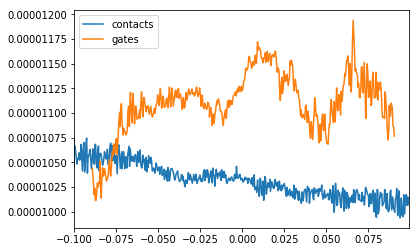

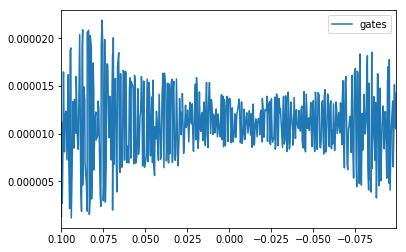

In [158]:
#mean = pd.rolling_mean(df1,2)
mean = df2.rolling(window=50, center=True).mean()
#ax = df2.plot()
ax = df1.plot()
mean.plot(ax = ax)
df2.plot()

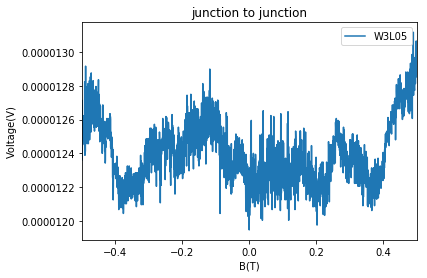

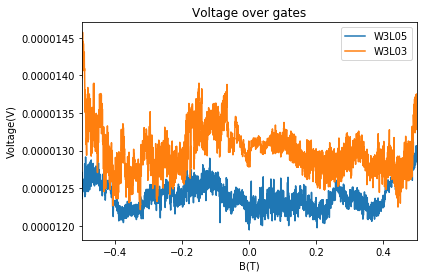

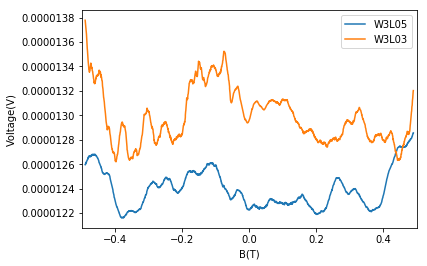

In [213]:
filename1 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_wl_3_03_M_2.dat'
B1, Voltage1 = loadMagSweep(filename1,0,3)
df1 = pd.DataFrame(data=Voltage1, index=B1, columns=['W3L05'])


filename2 = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_wl_3_03_M_2.dat'
B2, Voltage2 = loadMagSweep(filename2,0,4)
df2 = pd.DataFrame(data=Voltage2, index=B2, columns=['W3L03'])


ax = df1.plot(label="junction", title="junction to junction")
ax.set_xlabel("B(T)")
ax.set_ylabel("Voltage(V)")
#df2.plot(ax=ax, label="gates")

ax = df1.plot(title="Voltage over gates")
ax.set_xlabel("B(T)")
ax.set_ylabel("Voltage(V)")
df2.plot(ax=ax)

mean1 = df1.rolling(window=50, center=True).mean()
mean2 = df2.rolling(window=50, center=True).mean()
ax = mean1.plot()
ax.set_xlabel("B(T)")
ax.set_ylabel("Voltage(V)")
mean2.plot(ax=ax)